In [1]:
import os

import cv2

import matplotlib.pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.utils import to_categorical

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC 

from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Function to load and preprocess images

def load_and_preprocess_data(folder_path, label):

    data = []

    labels = []

    for filename in os.listdir(folder_path):

        img_path = os.path.join(folder_path, filename)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        img = cv2.resize(img, (64, 64))  # Adjust the size as needed

        data.append(img)

        labels.append(label)

    return data, labels

In [3]:
# Load and preprocess data

mild_demented_data, mild_demented_labels = load_and_preprocess_data('/kaggle/input/dataset-ad/Dataset/Mild_Demented', 0)

moderate_demented_data, moderate_demented_labels = load_and_preprocess_data('/kaggle/input/dataset-ad/Dataset/Moderate_Demented', 1)

non_demented_data, non_demented_labels = load_and_preprocess_data('/kaggle/input/dataset-ad/Dataset/Non_Demented', 2)

very_mild_demented_data, very_mild_demented_labels = load_and_preprocess_data('/kaggle/input/dataset-ad/Dataset/Very_Mild_Demented', 3)

In [4]:
# Combine data and labels

data = np.array(mild_demented_data + moderate_demented_data + non_demented_data + very_mild_demented_data)

labels = np.array(mild_demented_labels + moderate_demented_labels + non_demented_labels + very_mild_demented_labels)

In [5]:
# Convert labels to one-hot encoding

labels_one_hot = to_categorical(labels, num_classes=4)

In [6]:
# Split the data into training and testing sets

train_data, test_data, train_labels, test_labels = train_test_split(data, labels_one_hot, test_size=0.3, random_state=42)


In [7]:
# Normalize pixel values to be between 0 and 1

train_data = train_data / 255.0

test_data = test_data / 255.0

In [8]:
# Build and train the CNN model

model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),

    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation='relu'),

    Dense(4, activation='softmax')  # Adjust the number of units for the output layer

])

epochs=15

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(np.expand_dims(train_data, axis=-1), train_labels, epochs=epochs, batch_size=32, validation_split=0.2)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


I0000 00:00:1732126645.198580      99 service.cc:145] XLA service 0x7be624004d30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732126645.198635      99 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732126645.198639      99 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 48/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4247 - loss: 1.1134 

I0000 00:00:1732126647.776730      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4803 - loss: 1.0430 - val_accuracy: 0.5871 - val_loss: 0.8969
Epoch 2/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6832 - loss: 0.7593 - val_accuracy: 0.7400 - val_loss: 0.6540
Epoch 3/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8157 - loss: 0.5273 - val_accuracy: 0.7835 - val_loss: 0.5344
Epoch 4/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9015 - loss: 0.3514 - val_accuracy: 0.8560 - val_loss: 0.4157
Epoch 5/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9319 - loss: 0.2433 - val_accuracy: 0.8817 - val_loss: 0.3470
Epoch 6/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9568 - loss: 0.1666 - val_accuracy: 0.8895 - val_loss: 0.3069
Epoch 7/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9780 - loss: 0.1081 - val_accuracy: 0.9051 - val_loss: 0.2799
Epoch 8/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0747 - val_accuracy: 0.8884 - val_

In [9]:
# Extract features using the trained CNN model

train_features = model.predict(np.expand_dims(train_data, axis=-1))

test_features = model.predict(np.expand_dims(test_data, axis=-1))

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [10]:
# Build and train the SVM model

svm_model = SVC(kernel='linear', decision_function_shape='ovr')

svm_model.fit(train_features, np.argmax(train_labels, axis=1))

SVC(kernel='linear')

In [11]:
# Predictions on the test set

svm_predictions = svm_model.predict(test_features)

In [12]:
# Evaluate the SVM model

accuracy = accuracy_score(np.argmax(test_labels, axis=1), svm_predictions)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9463541666666667


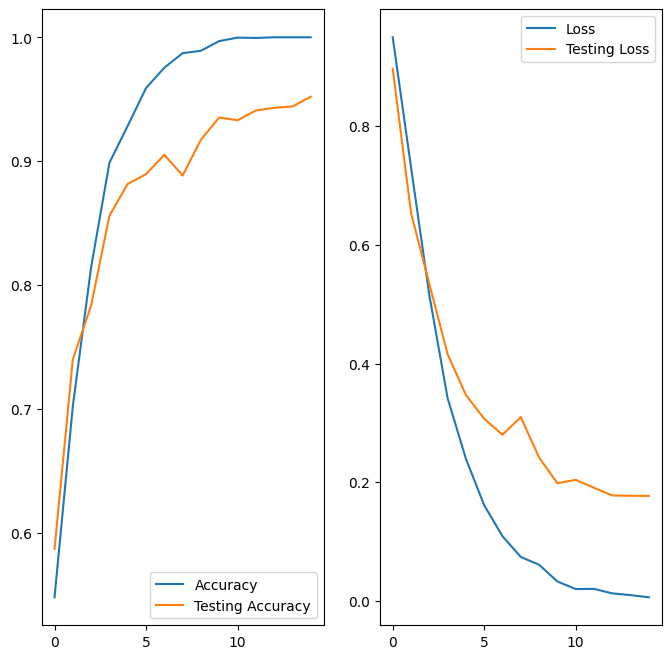

In [13]:
acc = history.history['accuracy']

val_acc =  history.history['val_accuracy']



loss = history.history['loss']

val_loss = history.history['val_loss']



epochs_range = range(epochs)



plt.figure(figsize=(8,8))

plt.subplot(1,2,1)

plt.plot(epochs_range,acc,label='Accuracy')

plt.plot(epochs_range,val_acc,label="Testing Accuracy")

plt.legend()



plt.subplot(1,2,2)

plt.plot(epochs_range,loss,label='Loss')

plt.plot(epochs_range,val_loss,label="Testing Loss")

plt.legend()

plt.show()

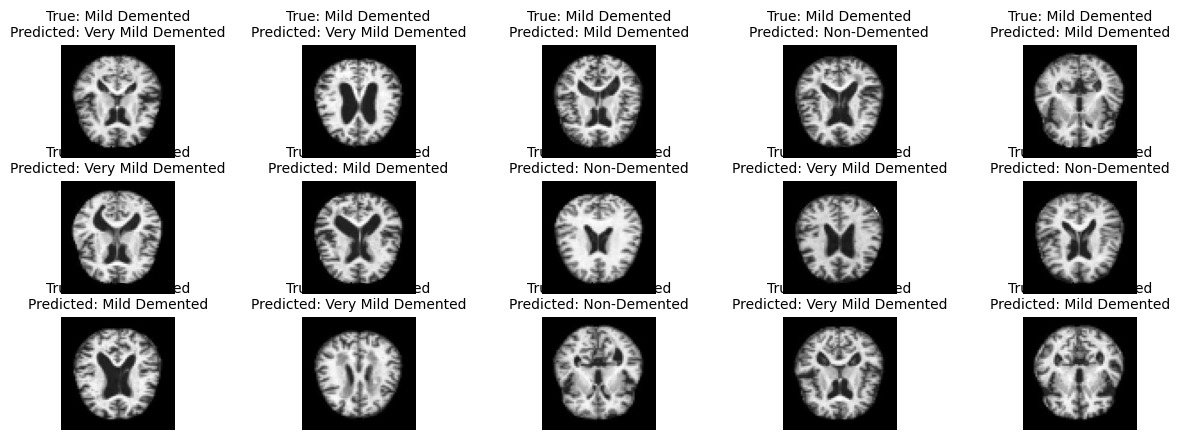

In [14]:
import matplotlib.pyplot as plt



# Function to display images with true and predicted labels

def display_predictions(images, true_labels, predicted_labels, class_names):

    plt.figure(figsize=(15, 5))

    for i in range(min(15, len(images))):  # Display predictions for up to 15 images

        plt.subplot(3, 5, i + 1)

        plt.imshow(images[i].reshape(64, 64), cmap='gray')

        true_class = class_names[np.argmax(true_labels[i])]

        predicted_class = class_names[predicted_labels[i]]

        plt.title(f"True: {true_class}\nPredicted: {predicted_class}",fontdict = {'fontsize' : 10})

        plt.axis('off')

    plt.show()



# Display predictions for 15 test images

num_display = 15

display_indices = np.random.choice(len(test_data), num_display, replace=False)



display_images = test_data[display_indices]

display_true_labels = np.argmax(test_labels[display_indices], axis=1)

display_svm_predictions = svm_model.predict(test_features[display_indices])

display_predicted_labels = np.argmax(to_categorical(display_svm_predictions, num_classes=4), axis=1)



# Define class names

class_names = ['Mild Demented', 'Moderate Demented', 'Non-Demented', 'Very Mild Demented']



# Display predictions

display_predictions(display_images, display_true_labels, display_predicted_labels, class_names)


In [15]:
train_data_flatten = train_data.reshape(train_data.shape[0], -1)
test_data_flatten = test_data.reshape(test_data.shape[0], -1)


In [17]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(train_data_flatten, np.argmax(train_labels, axis=1))


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [18]:
logistic_preds = logistic_model.predict(test_data_flatten)
logistic_accuracy = accuracy_score(np.argmax(test_labels, axis=1), logistic_preds)
print(f'Logistic Regression Accuracy: {logistic_accuracy}')


Logistic Regression Accuracy: 0.940625


In [19]:
# Predict and evaluate
logistic_preds = logistic_model.predict(test_data_flatten)
print("Logistic Regression Classification Report:\n")
print(classification_report(np.argmax(test_labels, axis=1), logistic_preds))
print("Logistic Regression Confusion Matrix:\n")
print(confusion_matrix(np.argmax(test_labels, axis=1), logistic_preds))


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       283
           1       1.00      1.00      1.00        15
           2       0.94      0.97      0.95       967
           3       0.94      0.90      0.92       655

    accuracy                           0.94      1920
   macro avg       0.96      0.95      0.95      1920
weighted avg       0.94      0.94      0.94      1920

Logistic Regression Confusion Matrix:

[[265   0  10   8]
 [  0  15   0   0]
 [  2   0 934  31]
 [ 11   0  52 592]]


In [20]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(train_data_flatten, np.argmax(train_labels, axis=1))


RandomForestClassifier()

In [21]:
rf_preds = random_forest_model.predict(test_data_flatten)
rf_accuracy = accuracy_score(np.argmax(test_labels, axis=1), rf_preds)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.9057291666666667


In [22]:
# Assuming random_forest_model is already trained 
rf_preds = random_forest_model.predict(test_data_flatten) 
print("Random Forest Classification Report:\n") 
print(classification_report(np.argmax(test_labels, axis=1), rf_preds)) 
print("Random Forest Confusion Matrix:\n") 
print(confusion_matrix(np.argmax(test_labels, axis=1), rf_preds))

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       283
           1       1.00      0.60      0.75        15
           2       0.89      0.99      0.93       967
           3       0.91      0.87      0.89       655

    accuracy                           0.91      1920
   macro avg       0.95      0.79      0.85      1920
weighted avg       0.91      0.91      0.90      1920

Random Forest Confusion Matrix:

[[202   0  35  46]
 [  0   9   5   1]
 [  0   0 955  12]
 [  0   0  82 573]]
